In [3]:
import os
import scanpy as sc
from scipy import sparse

In [4]:
%%time
adataD0 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599494_ES_d0_main.csv.bz2')
adataD2 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599497_ES_d2_LIFminus.csv.bz2')
adataD4 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599498_ES_d4_LIFminus.csv.bz2')
adataD7 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599499_ES_d7_LIFminus.csv.bz2')

CPU times: total: 10.7 s
Wall time: 10.7 s


In [5]:
adataD0

AnnData object with n_obs × n_vars = 24175 × 933

In [6]:
adataD2

AnnData object with n_obs × n_vars = 24175 × 303

In [7]:
adataD4

AnnData object with n_obs × n_vars = 24175 × 683

In [8]:
adataD7

AnnData object with n_obs × n_vars = 24175 × 798

In [9]:
adata = sc.AnnData.concatenate(adataD0.T, adataD2.T, adataD4.T, adataD7.T, batch_key='cluster',
                               batch_categories=['d0', 'd2', 'd4', 'd7', ])

D:\Anaconda3\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [10]:
adata

AnnData object with n_obs × n_vars = 2717 × 24175
    obs: 'cluster'

In [30]:
adata.X

<2713x24021 sparse matrix of type '<class 'numpy.float32'>'
	with 22411515 stored elements in Compressed Sparse Row format>

In [31]:
adata.obs

,cluster,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
0-d0,d0,14195,39366.0,14195,0.0,0.0
1-d0,d0,15330,44271.0,15330,0.0,0.0
2-d0,d0,15055,46656.0,15055,0.0,0.0
3-d0,d0,12729,30461.0,12729,0.0,0.0
4-d0,d0,7455,13396.0,7455,0.0,0.0
...,...,...,...,...,...,...
793-d7,d7,12538,31558.0,12538,0.0,0.0
794-d7,d7,16431,53669.0,16431,0.0,0.0
795-d7,d7,12634,30256.0,12634,0.0,0.0
796-d7,d7,16333,48644.0,16333,0.0,0.0


In [32]:
adata.var.T

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,associated,l7Rn6,n-R5s136
n_cells_by_counts,650,1148,881,508,1302,291,1069,1404,767,1321,...,1727,643,2380,1770,1484,1576,354,154,1945,12
mean_counts,0.314781,0.737191,0.450424,0.233321,0.844821,0.121268,0.676004,0.967932,0.394397,0.893476,...,2.848876,0.322521,6.661629,1.884998,1.235901,1.385182,0.151124,0.058975,2.001843,0.004792
pct_dropout_by_counts,76.041283,57.685219,67.526723,81.275341,52.008846,89.273867,60.597125,48.249171,71.728714,51.308515,...,36.343531,76.2993,12.274235,34.75857,45.300405,41.909325,86.951714,94.323627,28.308146,99.557685
total_counts,854.0,2000.0,1222.0,633.0,2292.0,329.0,1834.0,2626.0,1070.0,2424.0,...,7729.0,875.0,18073.0,5114.0,3353.0,3758.0,410.0,160.0,5431.0,13.0
n_cells,650,1148,881,508,1302,291,1069,1404,767,1321,...,1727,643,2380,1770,1484,1576,354,154,1945,12
mt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
adata.X = sparse.csr_matrix(adata.X)

In [12]:
adata.X

<2717x24175 sparse matrix of type '<class 'numpy.float32'>'
	with 22487100 stored elements in Compressed Sparse Row format>

In [13]:
sparse.csc_matrix.todense(adata.X)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [3., 3., 3., ..., 0., 0., 0.],
        [1., 2., 0., ..., 0., 0., 0.],
        ...,
        [0., 2., 0., ..., 0., 0., 0.],
        [2., 1., 1., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [16]:
adata = adata[adata.obs.total_counts < 75000, :]

In [17]:
adata

View of AnnData object with n_obs × n_vars = 2713 × 24175
    obs: 'cluster', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [18]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\pytorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


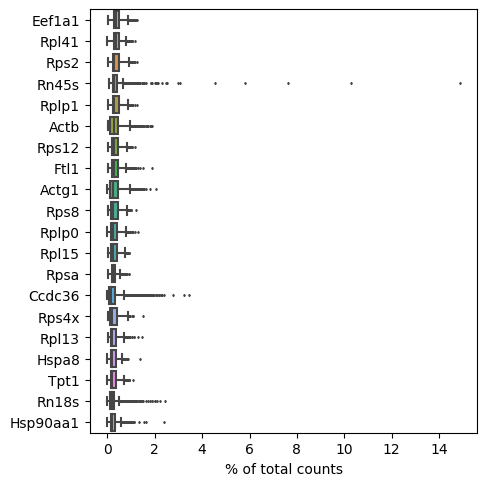

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

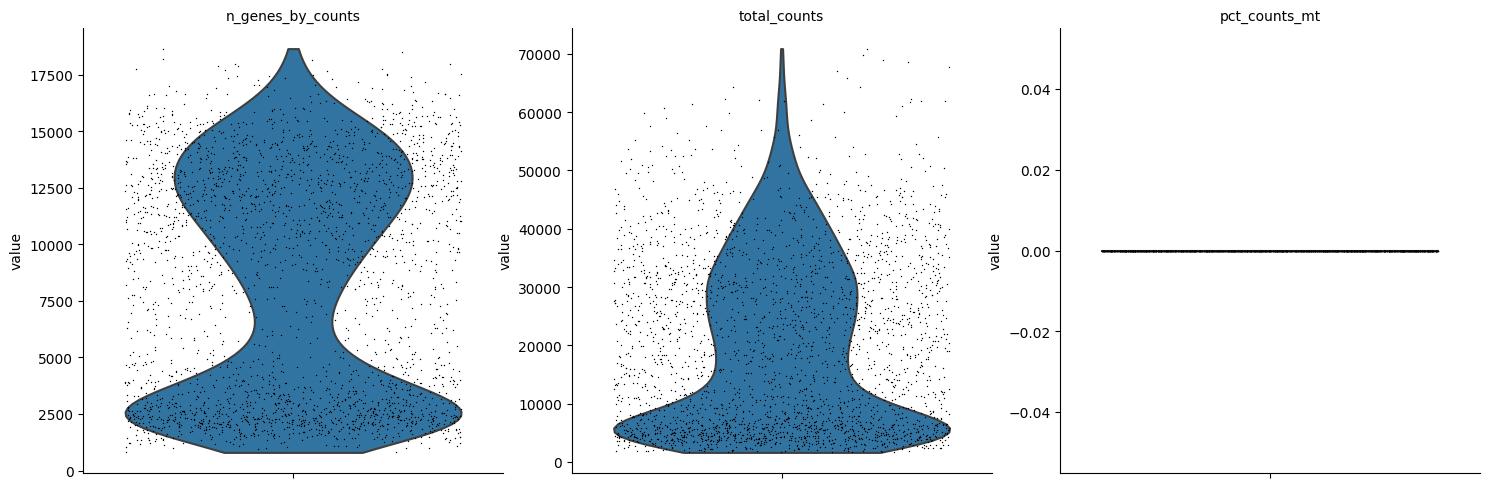

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

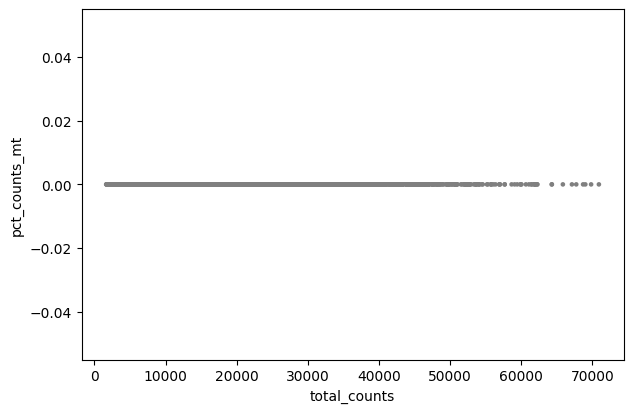

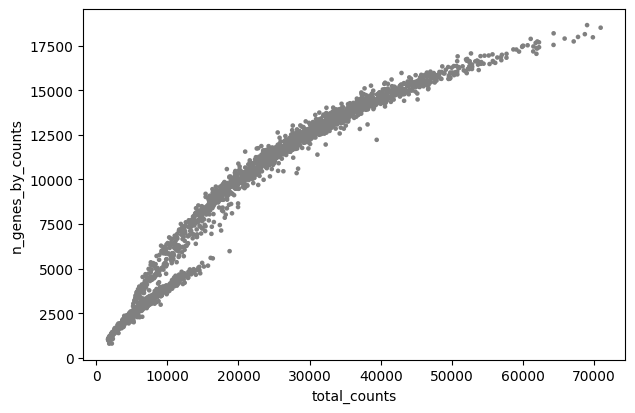

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata.raw = adata

In [20]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Klein/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Klein/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Klein/processed/Klein.h5ad')